In [115]:
'''import all necessary libraries'''

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [116]:
'''costumer churn data set from kaggle'''

churn_df = pd.read_csv(
    'drive/MyDrive/customer_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [117]:
churn_df.shape

(7043, 21)

In [118]:
'''customerID is not a useful feature to predict churn'''
churn_df.drop('customerID', axis='columns', inplace=True)

In [119]:
for column in churn_df.columns:
  print(f'{column}: {churn_df[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [120]:
'''"No internet service","No phone service" is similar to NO'''
churn_df.replace('No internet service','No',inplace=True)
churn_df.replace('No phone service','No',inplace=True)

Get dummy variable for some coulmns with labels

In [121]:
churn_df1 = pd.get_dummies(data=churn_df, columns=['InternetService','Contract',
                                                   'PaymentMethod'])

In [122]:
churn_df1['gender'].replace({'Female':1,'Male':0},inplace=True)
churn_df1.replace({'Yes':1,'No':0},inplace=True)

In [123]:
for column in churn_df1.columns:
  print(f'{column}: {churn_df1[column].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [124]:
churn_df1 = churn_df1[churn_df1.TotalCharges!=' '] # delete rows include empty cell in totalcharges
churn_df1.shape

(7032, 27)

In [125]:
churn_df1.TotalCharges = pd.to_numeric(churn_df1.TotalCharges) # change datatype 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [126]:
dict_columns_type = {'InternetService_DSL': int,
                'InternetService_Fiber optic': int,
                'InternetService_No':int,
                'Contract_Month-to-month':int,
                'Contract_One year':int,
                'Contract_Two year':int,
                'PaymentMethod_Bank transfer (automatic)':int,
                'PaymentMethod_Credit card (automatic)':int,
                'PaymentMethod_Electronic check':int,
                'PaymentMethod_Mailed check':int
               }
    
churn_df1 = churn_df1.astype(dict_columns_type)


In [127]:
churn_df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

Insights of how different feature affect churn

In [128]:
totalcharges_no = churn_df1[churn_df1.Churn == 0].TotalCharges
totalcharges_yes = churn_df1[churn_df1.Churn == 1].TotalCharges

In [129]:
tenure_no = churn_df1[churn_df1.Churn == 0].tenure
tenure_yes = churn_df1[churn_df1.Churn == 1].tenure

In [130]:
female_no = churn_df1[churn_df1.Churn == 0].gender
female_yes = churn_df1[churn_df1.Churn == 1].gender
male_no = churn_df1[churn_df1.Churn == 0].gender
male_yes = churn_df1[churn_df1.Churn == 1].gender

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


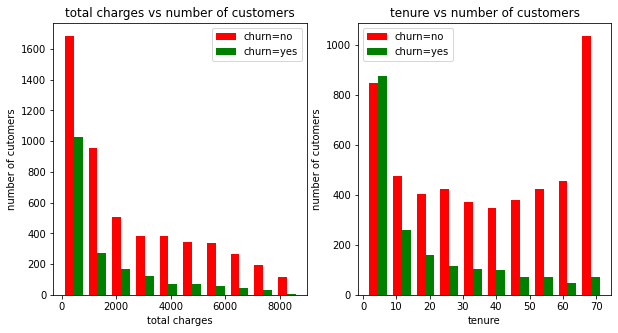

In [131]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.xlabel('total charges')
plt.ylabel('number of cutomers')
plt.title('total charges vs number of customers')

plt.hist([totalcharges_no,totalcharges_yes],rwidth=0.75,color=['red','green'], label=['churn=no','churn=yes'])
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('tenure')
plt.ylabel('number of cutomers')
plt.title('tenure vs number of customers')

plt.hist([tenure_no,tenure_yes],rwidth=0.75,color=['red','green'], label=['churn=no','churn=yes'])
plt.legend()

Apply scaling on the features which values are not in between 0 and 1,
we use min max scaling from sklearn

In [132]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
churn_df1[cols_to_scale] = scaler.fit_transform(churn_df1[cols_to_scale])

In [133]:
X = churn_df1.drop(['Churn','gender','TechSupport'],axis='columns')
y = churn_df1['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

Now we create nueral network for category classification, In which we define hidden layers using keras from tensorflow

In [134]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(24, input_shape=(24,), activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    # keras.layers.Dense(14, activation='relu'),
    # keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
epoch = 50
ind = list()
for i in range(50):
  ind.append(i)
history = model.fit(X_train, y_train, epochs=50).history

Epoch 1/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4833 - accuracy: 0.7586
Epoch 2/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4268 - accuracy: 0.7950
Epoch 3/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4206 - accuracy: 0.7989
Epoch 4/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4165 - accuracy: 0.8030
Epoch 5/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4146 - accuracy: 0.8041
Epoch 6/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4124 - accuracy: 0.8044
Epoch 7/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4124 - accuracy: 0.8068
Epoch 8/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4098 - accuracy: 0.8053
Epoch 9/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4086 - accuracy: 0.8084
Epoch 10/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4084 - accuracy: 0.8091

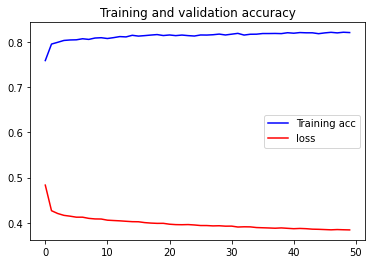

In [135]:
plt.plot(ind, history['accuracy'], 'blue', label='Training acc')
plt.plot(ind, history['loss'], 'red', label='loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [136]:
yp = model.predict(X_test)

'''convert float values into category 1 and 0 using thresold point 0.5'''
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [137]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       999
           1       0.68      0.44      0.53       408

    accuracy                           0.78      1407
   macro avg       0.74      0.68      0.69      1407
weighted avg       0.76      0.78      0.76      1407



Text(69.0, 0.5, 'Truth')

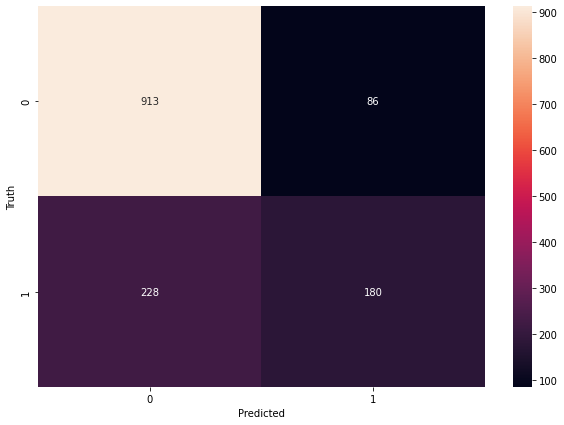

In [138]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now we find accuracy using logistic regression

In [139]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [140]:
from sklearn import metrics

y_pred = logisticRegr.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.7945984363894811

In [141]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.55      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



Text(69.0, 0.5, 'Truth')

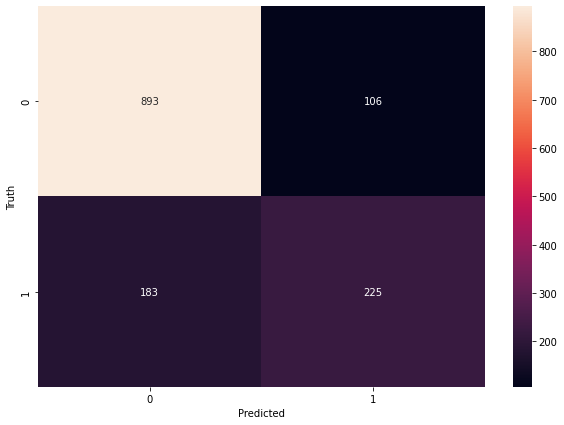

In [142]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')